# New Catalog

In [10]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [11]:
demografia = catalog.load("demografia_clean")
insulina = catalog.load("insulina_clean")
perfilB = catalog.load("perfilBioquimico_clean")
presion = catalog.load("presion_clean")
medidas = catalog.load("medidasCorporales_clean")

[10/19/24 19:18:52] INFO     Loading data from demografia_clean (ParquetDataset)...             ]8;id=57478;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=818722;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from insulina_clean (ParquetDataset)...               ]8;id=359035;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=523231;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from perfilBioquimico_clean (ParquetDataset)...       ]8;id=989395;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=59421;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from presion_clean (ParquetDataset)...                ]8;id=405188;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=438467;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from medidasCorporales_clean (ParquetDataset)...      ]8;id=836357;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=272700;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

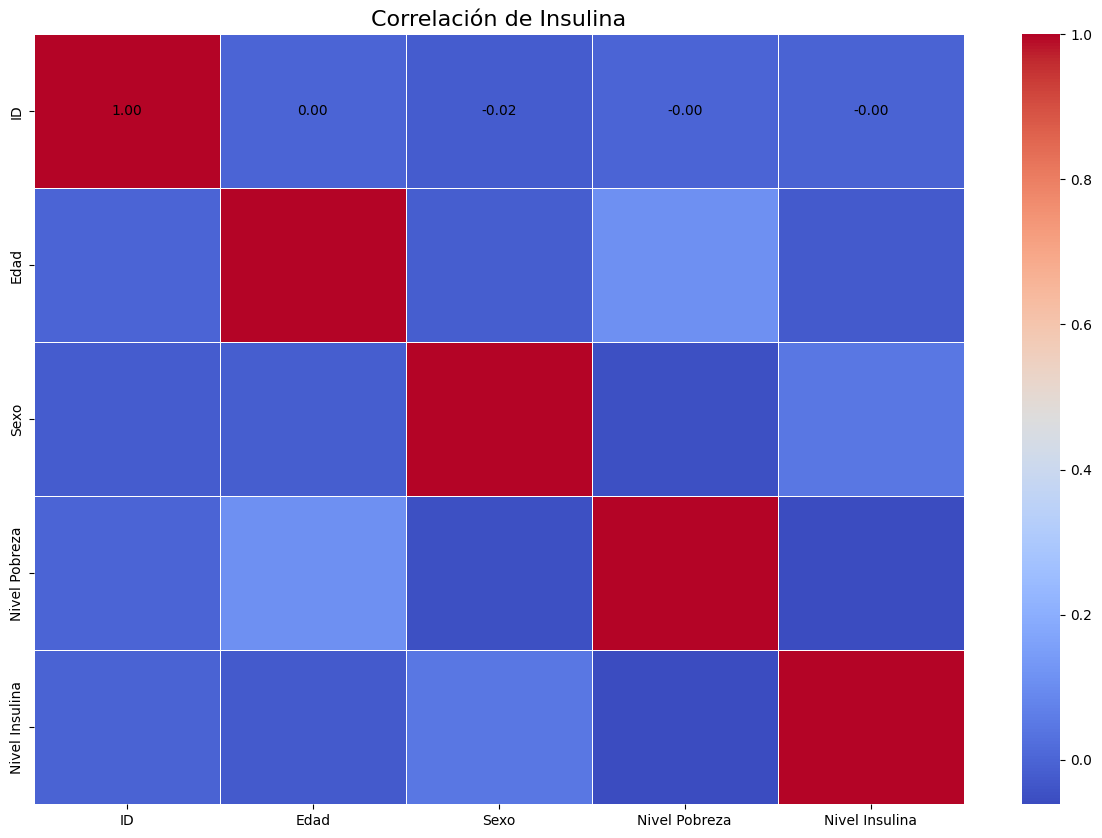

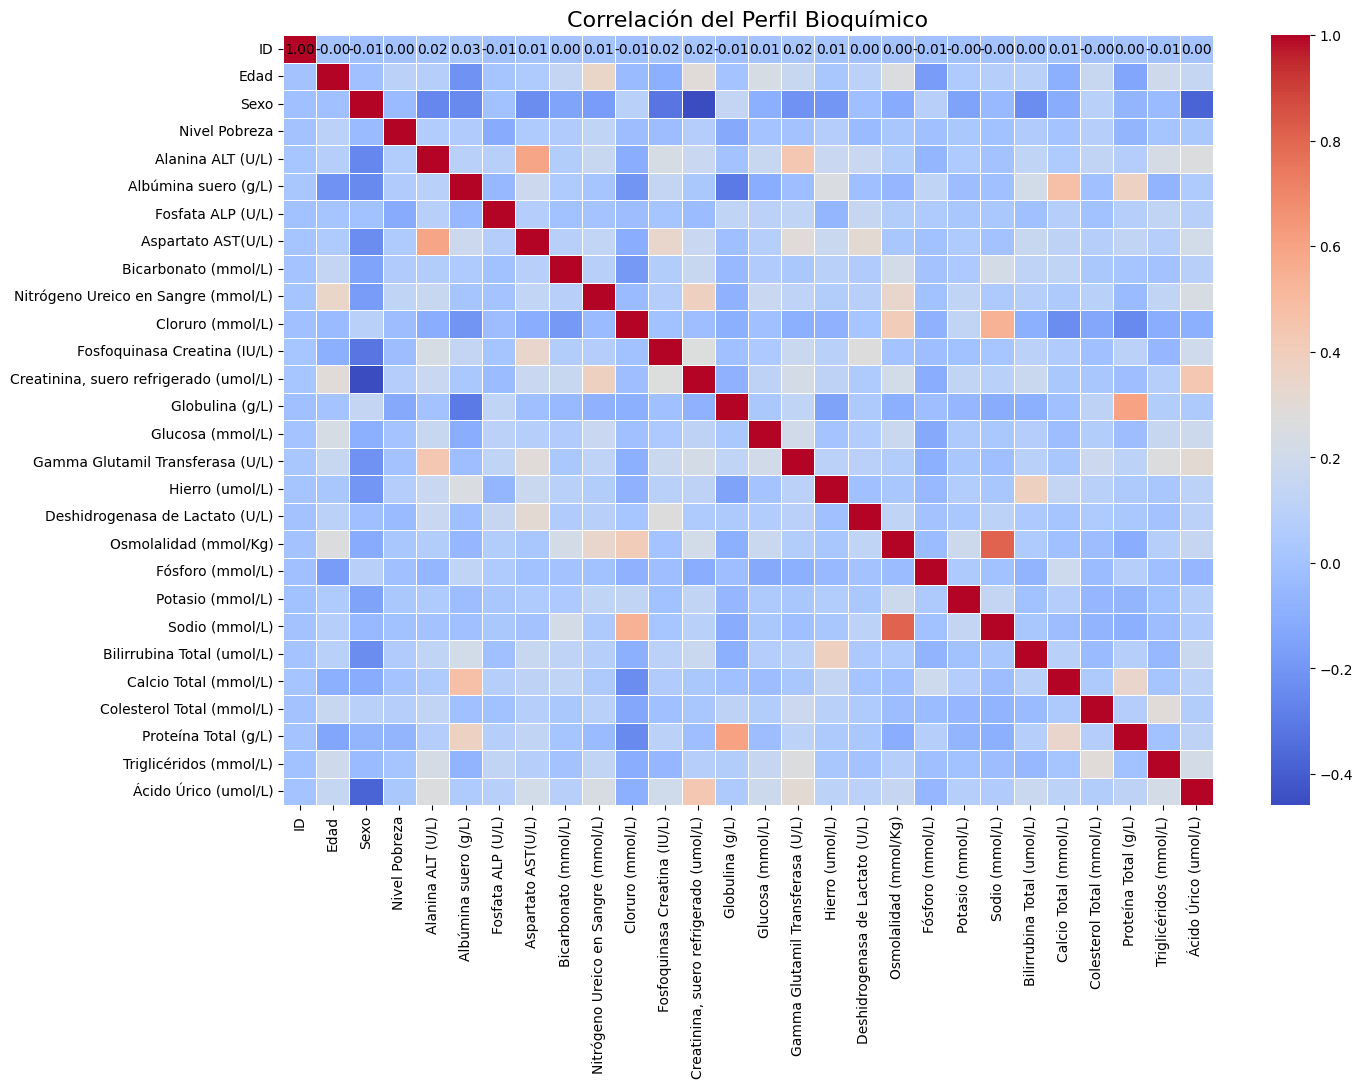

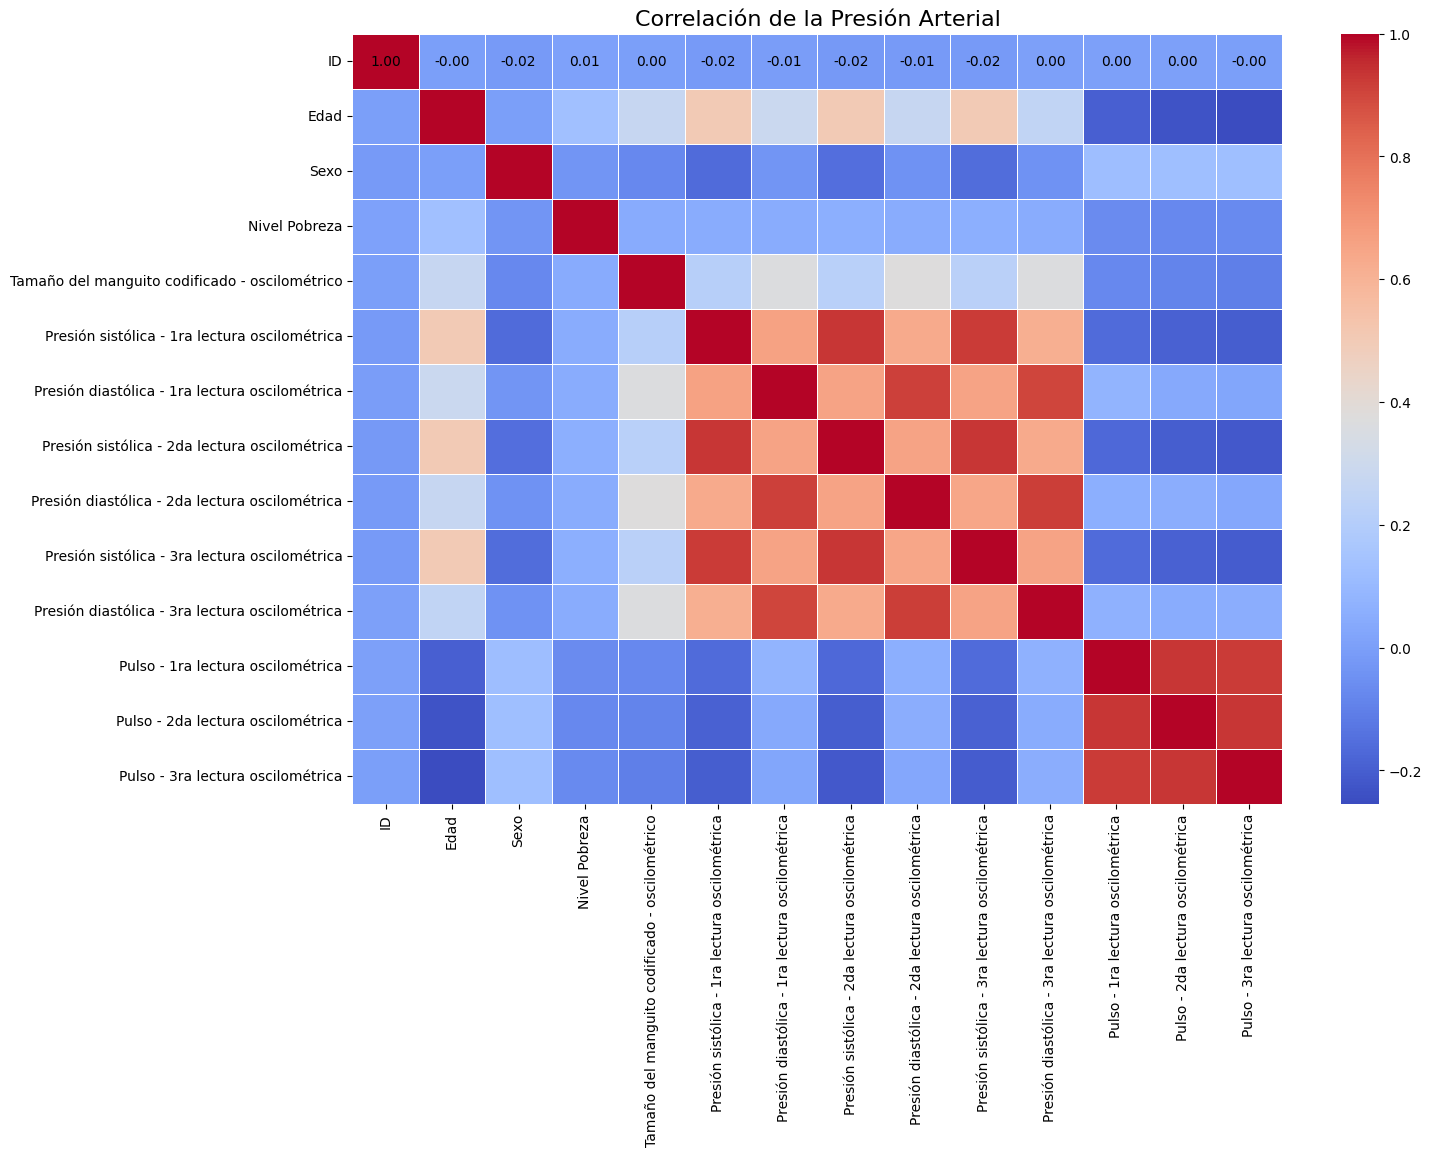

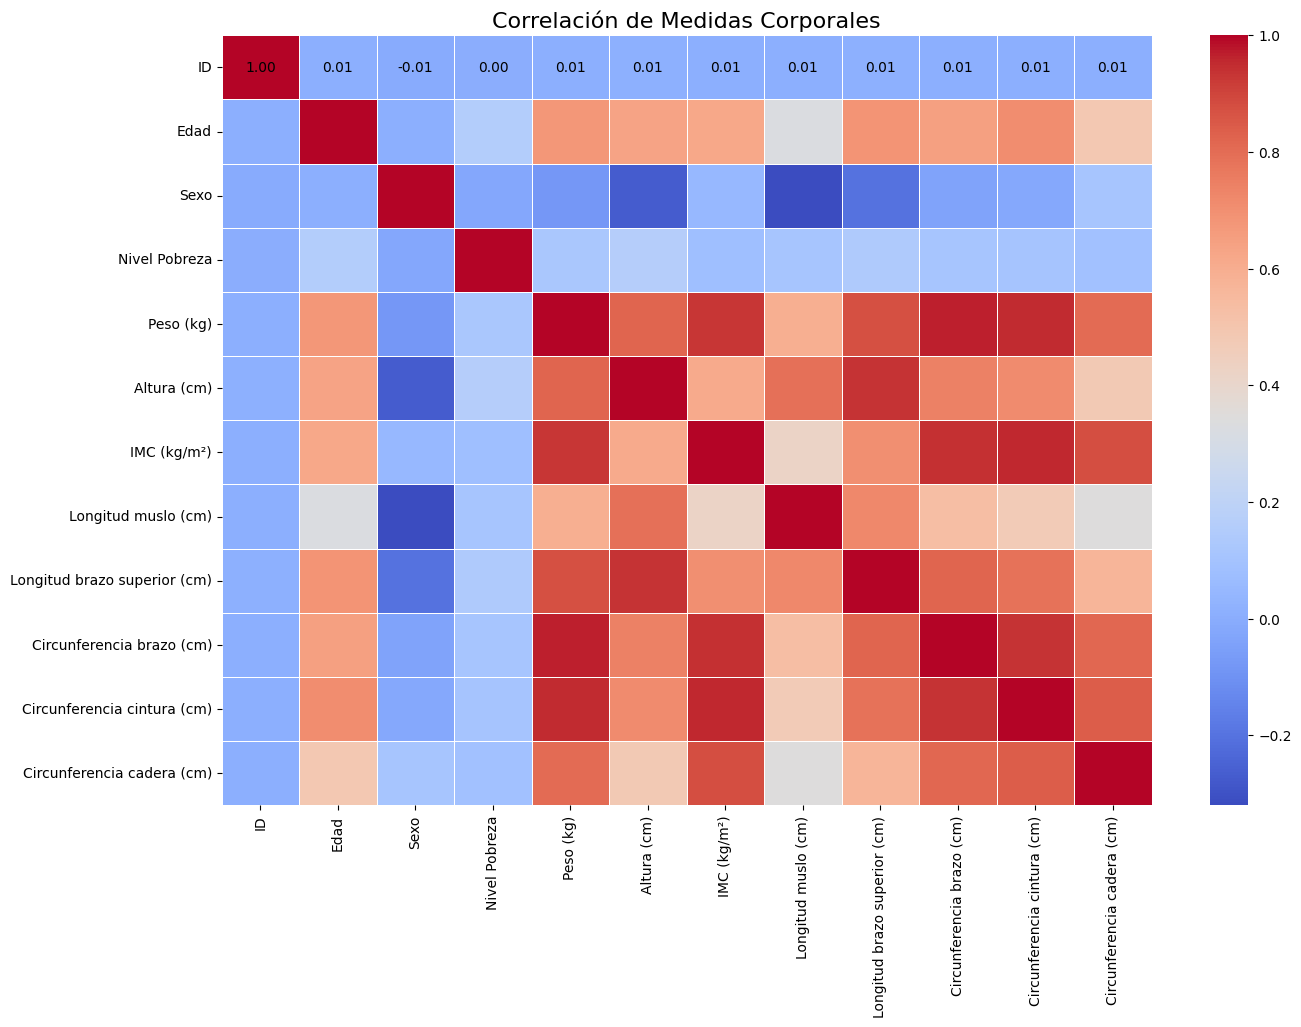

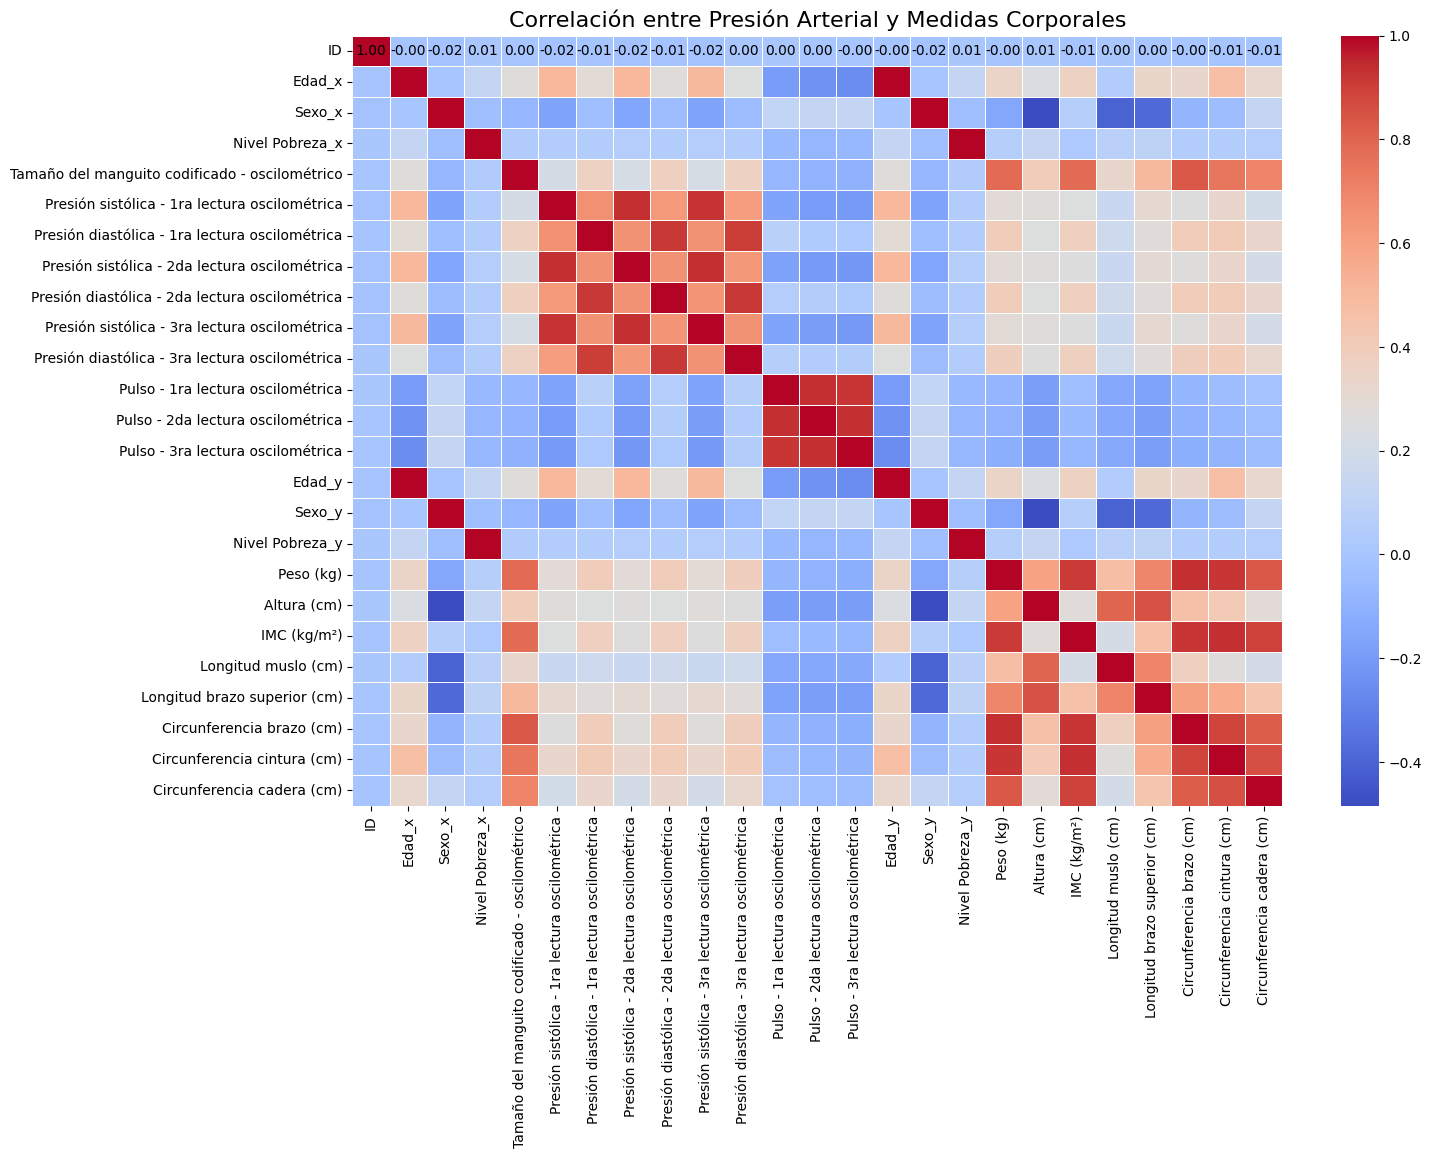

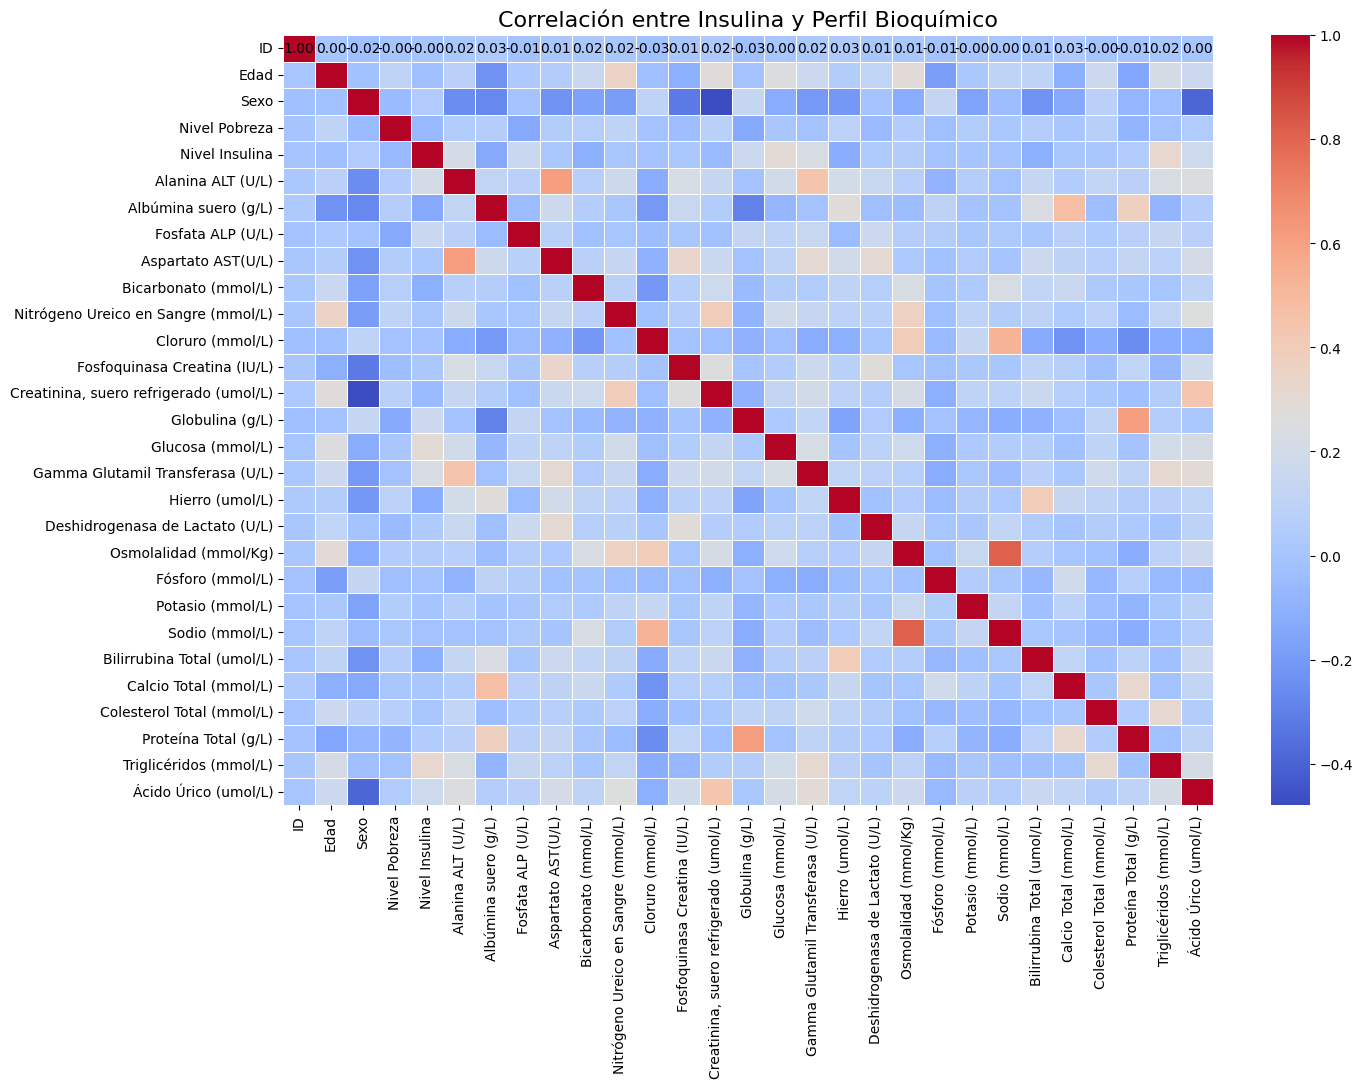

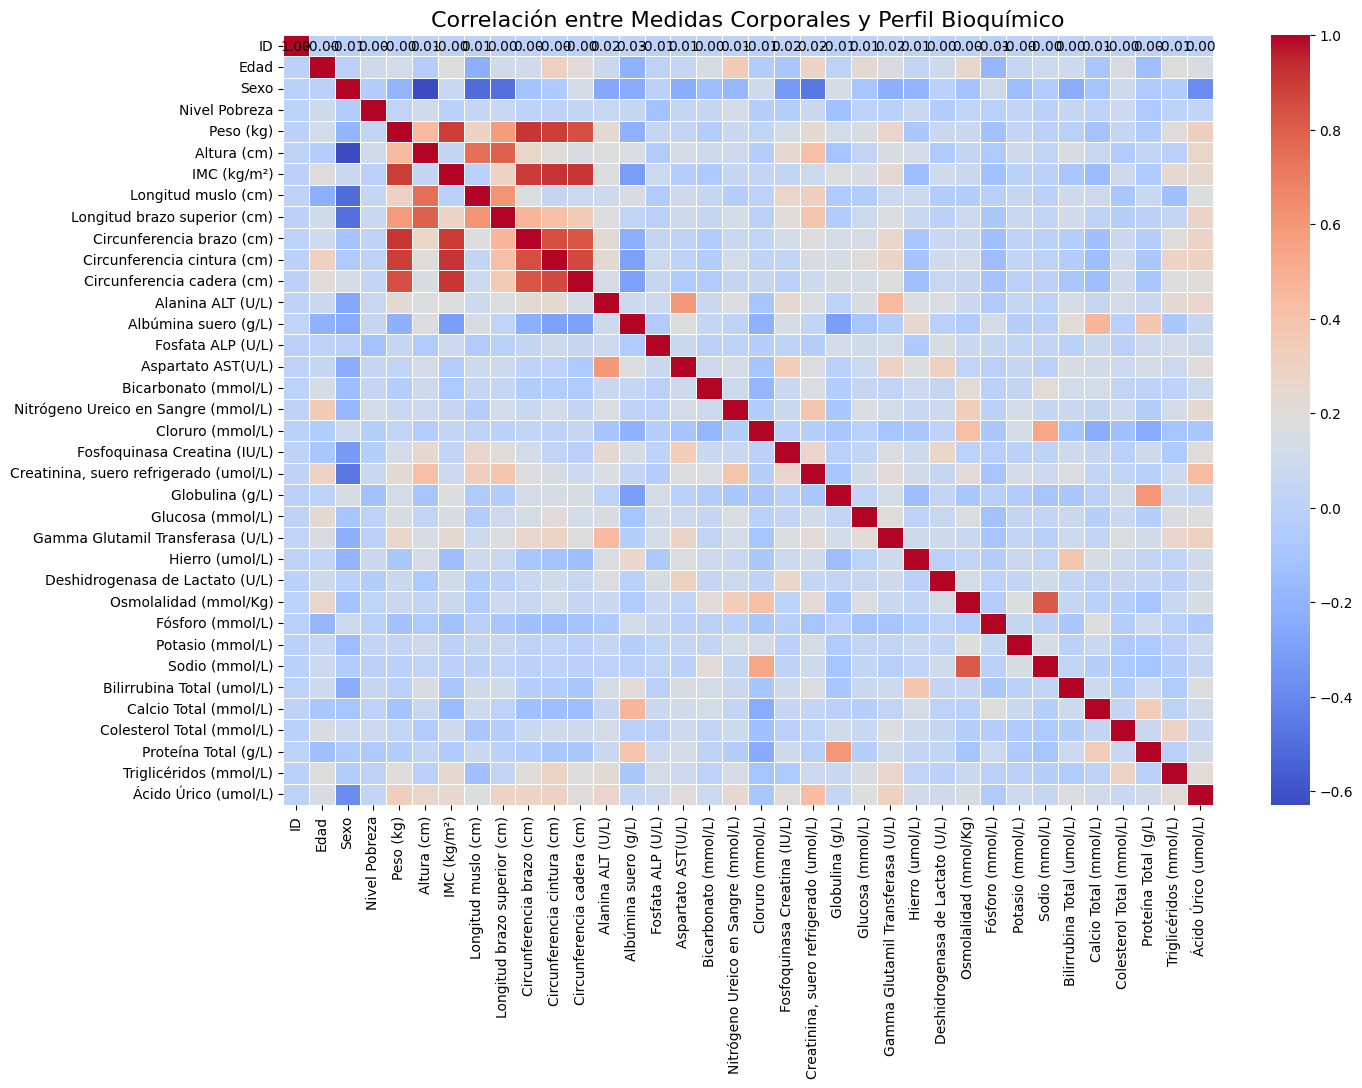

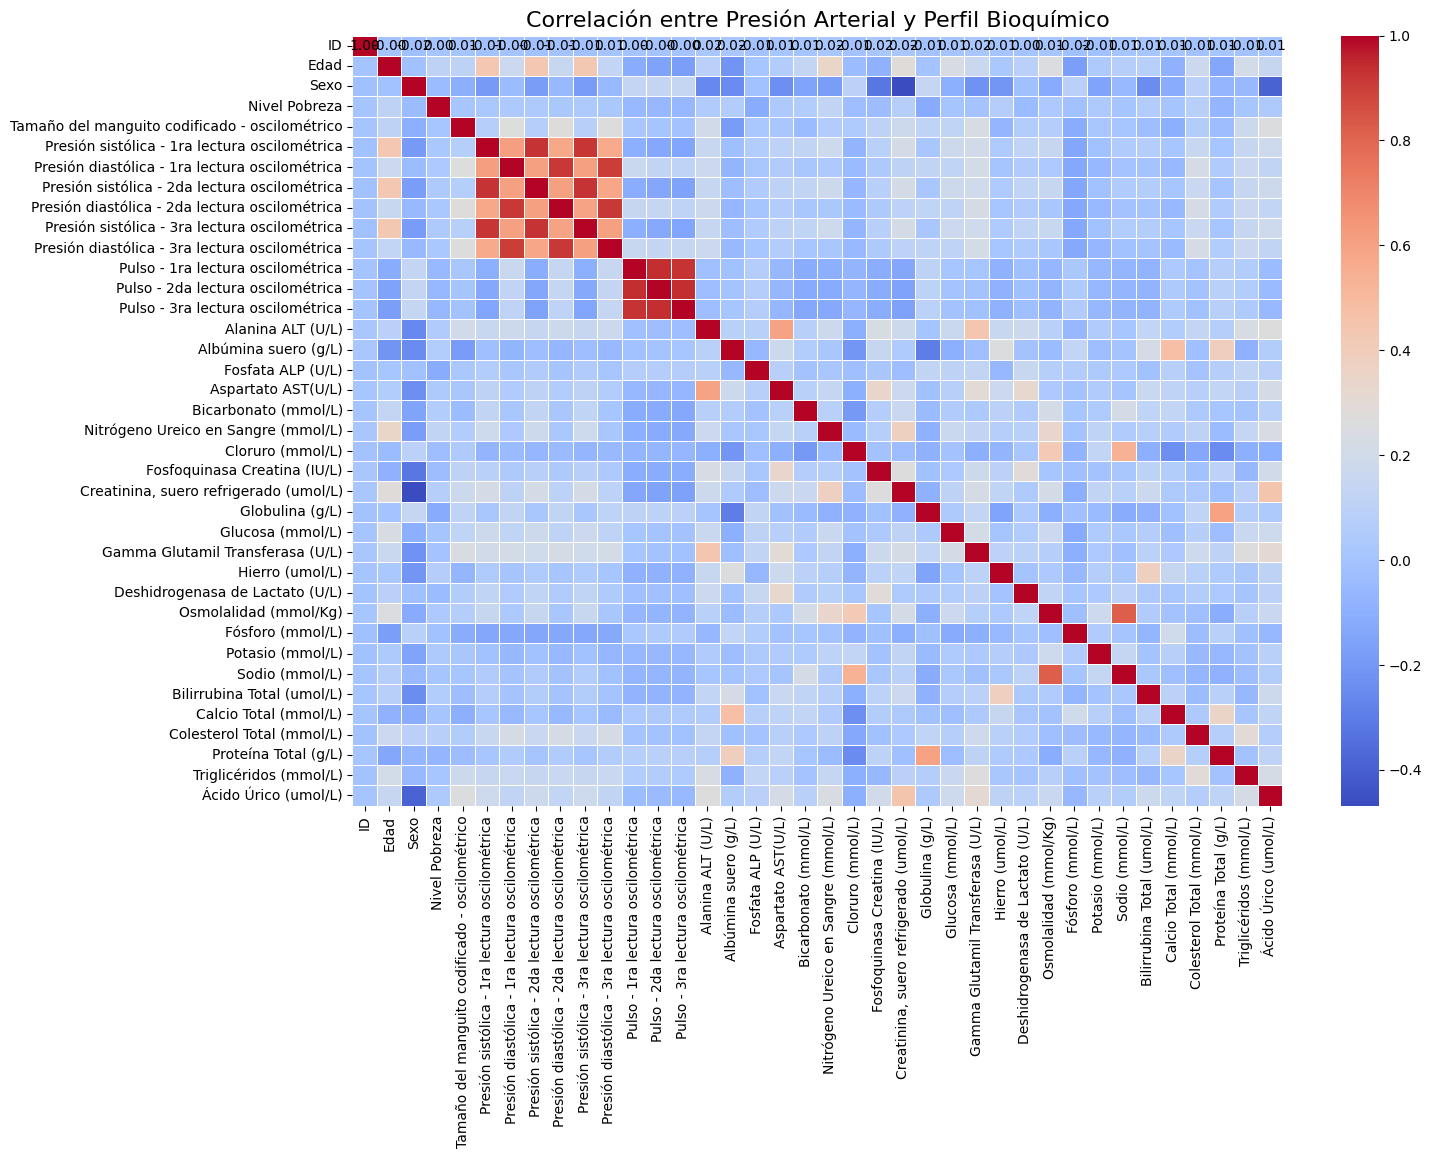

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Diccionario de dataframes
dataframes = {
    'insulina': insulina,
    'perfilB': perfilB,
    'presion': presion,
    'medidas': medidas,
    'presion_medidas': pd.merge(presion, medidas, how='inner', on='ID'),
    'insu_perfil': pd.merge(insulina, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza']),
    'medidas_perfil': pd.merge(medidas, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza']),
    'presion_perfil': pd.merge(presion, perfilB, how='inner', on=['ID', 'Edad', 'Sexo', 'Nivel Pobreza'])
}

# Diccionario de títulos para los heatmaps
titulos = {
    'insulina': 'Correlación de Insulina',
    'perfilB': 'Correlación del Perfil Bioquímico',
    'presion': 'Correlación de la Presión Arterial',
    'medidas': 'Correlación de Medidas Corporales',
    'presion_medidas': 'Correlación entre Presión Arterial y Medidas Corporales',
    'insu_perfil': 'Correlación entre Insulina y Perfil Bioquímico',
    'medidas_perfil': 'Correlación entre Medidas Corporales y Perfil Bioquímico',
    'presion_perfil': 'Correlación entre Presión Arterial y Perfil Bioquímico'
}

# Iterar sobre los dataframes y generar los heatmaps con títulos específicos
for data, title in titulos.items():
    corr_matrix = dataframes[data].corr()

    # Crear el heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"color": "black"})
    
    # Ajustar títulos y etiquetas
    plt.title(title, fontsize=16)
    plt.show()
